In [71]:
import pandas
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
td = pandas.read_table("train.tsv")
print(td)

      id  survived  pclass     sex   age  sibsp  parch      fare embarked
0      3         1       1  female  35.0      1      0   53.1000        S
1      4         0       3    male  35.0      0      0    8.0500        S
2      7         0       3    male   2.0      3      1   21.0750        S
3      9         1       2  female  14.0      1      0   30.0708        C
4     11         1       1  female  58.0      0      0   26.5500        S
5     13         0       3    male  39.0      1      5   31.2750        S
6     16         0       3    male   2.0      4      1   29.1250        Q
7     19         1       3  female   NaN      0      0    7.2250        C
8     23         1       1    male  28.0      0      0   35.5000        S
9     24         0       3  female   8.0      3      1   21.0750        S
10    25         1       3  female  38.0      1      5   31.3875        S
11    26         0       3    male   NaN      0      0    7.2250        C
12    28         1       3  female   N

In [19]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
id          445 non-null int64
survived    445 non-null int64
pclass      445 non-null int64
sex         445 non-null object
age         360 non-null float64
sibsp       445 non-null int64
parch       445 non-null int64
fare        445 non-null float64
embarked    443 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 31.4+ KB


In [22]:
td.to_csv("td.csv")

In [50]:
print(td.isnull().sum())

id           0
survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64


In [159]:
#欠損値がある為、ageとembarkedを削除
td=td.drop("embarked",axis=1)
td=td.drop("age",axis=1)

In [160]:
#性別も変換
#男：0、女：1
td.sex.replace('male', 0,inplace=True)
td.sex.replace('female', 1,inplace=True)
td.head()

,id,survived,pclass,sex,sibsp,parch,fare
0,3,1,1,1,1,0,53.1000
1,4,0,3,0,0,0,8.0500
2,7,0,3,0,3,1,21.0750
3,9,1,2,1,1,0,30.0708
4,11,1,1,1,0,0,26.5500


In [126]:
td.corr()

,id,survived,pclass,sex,sibsp,parch,fare
id,1.000000,0.024264,-0.059345,-0.033435,-0.020491,-0.031417,0.077649
survived,0.024264,1.000000,-0.358097,0.559465,-0.045087,0.079669,0.258605
pclass,-0.059345,-0.358097,1.000000,-0.193761,0.069857,-0.015726,-0.549651
sex,-0.033435,0.559465,-0.193761,1.000000,0.097883,0.220046,0.168935
sibsp,-0.020491,-0.045087,0.069857,0.097883,1.000000,0.423522,0.164773
parch,-0.031417,0.079669,-0.015726,0.220046,0.423522,1.000000,0.241855
fare,0.077649,0.258605,-0.549651,0.168935,0.164773,0.241855,1.000000


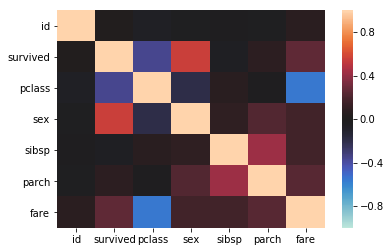

In [161]:
#生存値と各値の相関係数を可視化
heatMap=td.corr()
sns.heatmap(heatMap, vmax=1, vmin=-1, center=0)

In [162]:
#ロジスティック回帰により生存確率を求めてみる
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#データセットを説明変数と目的変数に分割
X, y = td.drop(["id","survived"],axis=1), td.survived
clf = LogisticRegression()
# Stratified K-Fold CV で性能を評価する
skf = StratifiedKFold(shuffle=True)
scoring = {
    'acc': 'accuracy',
    'auc': 'roc_auc',
}
scores = cross_validate(clf, X, y, cv=skf, scoring=scoring)
print('Accuracy (mean):', scores['test_acc'].mean())
print('AUC (mean):', scores['test_auc'].mean())

Accuracy (mean): 0.7909723173385684
AUC (mean): 0.8352499956718201


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify

In [163]:
#モデルを当てはめてみる
from sklearn.model_selection import train_test_split

X, y = td.drop(["id","survived"],axis=1), td.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)
clf.fit(X_train, y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))
print("各説明変数の係数:",clf.coef_)

train result: 0.8198198198198198
test result: 0.7321428571428571
各説明変数の係数: [[-0.78344758  2.76533564 -0.15102586 -0.18003761  0.00569394]]


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [164]:
#標準化によるスケーリングをしてみる
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf.fit(X_train_std, y_train)

print("train result:",clf.score(X_train_std,y_train))
print("test result:" , clf.score(X_test_std,y_test))
print("各説明変数の係数:",clf.coef_)

train result: 0.8228228228228228
test result: 0.7321428571428571
各説明変数の係数: [[-0.71021403  1.4221357  -0.18830798 -0.16662194  0.30253793]]


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [208]:
#提出データについても予測してみる

test = pandas.read_table("test.tsv")
#欠損値がある為、ageとembarkedを削除
#ただしテストデータにはnull値ない可能性あり。
test = test.drop("embarked",axis=1)
test = test.drop("age",axis=1)
#性別も変換
#男：0、女：1
test.sex.replace('male', 0,inplace=True)
test.sex.replace('female', 1,inplace=True)
test.head()

X_predict = test.drop(["id"],axis=1)
res = clf.predict(X_predict)

#提出用にtsv出力
for i in range(res.shape[0]):
    print(test.id[i],res[i],sep='\t')

0	0
1	1
2	1
5	0
6	1
8	1
10	1
12	0
14	1
15	1
17	1
18	1
20	1
21	1
22	1
27	1
30	1
31	1
34	1
35	1
37	0
38	1
39	1
40	1
45	0
46	1
48	1
49	1
50	1
51	0
52	1
54	1
55	1
60	0
62	1
64	1
65	1
66	1
68	1
71	1
74	1
75	0
76	0
77	0
78	1
79	1
81	1
85	1
89	0
90	0
92	1
96	1
97	1
100	1
101	0
102	1
103	0
104	0
105	0
107	0
108	0
109	1
113	1
116	0
118	1
122	1
124	1
127	0
132	1
133	1
140	1
141	1
142	1
144	1
145	1
150	1
154	0
155	1
156	1
157	0
158	0
159	1
161	1
162	0
165	1
167	1
170	1
171	1
172	1
173	0
175	0
178	1
179	0
181	1
185	1
187	1
188	1
190	1
193	1
194	1
196	0
198	1
200	1
202	0
204	0
205	1
206	1
208	1
210	0
211	1
214	0
215	1
218	1
220	0
222	0
223	0
229	1
230	1
231	0
233	1
235	1
236	1
238	1
239	1
240	1
241	1
242	1
243	0
245	1
247	1
249	1
250	0
251	1
252	1
253	1
255	1
258	1
261	1
262	1
263	0
264	1
266	1
267	0
268	1
270	1
271	0
272	1
278	1
279	1
283	0
285	0
293	1
294	0
298	1
299	1
301	1
302	0
303	1
304	0
306	1
308	1
309	1
310	1
311	1
312	1
313	0
315	1
316	1
317	1
318	1
319	1
320	0
327	1
331	1
333	1
334	1
337